# Explore pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.counts.csv

- [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE133684](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE133684)
- /extraCellularRNA/R/notebooks/pancreas.plasma.ev.long.RNA.DESeq.normalize.Rmd
- aedavids@ucsc.edu
- 10/15/2020

In [11]:
from   bme263DataVis.utilities import MatPlotLibUtilities
from   bme263DataVis.plotCumulativeProbablty import PlotCumulativeProbablity
from   bme263DataVis.plotProbMassFunc import PlotProbMass

# https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
# display(HTML(' <span style="color:red">the title is: <h1>Hello, world!</h1> </span>  '))
# display(HTML(df.to_html()))
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib as pl

mplu = MatPlotLibUtilities()
mplu.loadStyle()

# macbookpro = "../data/R/output"
# courtyard = "../R/output"
# biodataRootDir = courtyard
biodataRootDir = "../data/R/output"
#dataSet = "normalizedCounts.gencode.v35.tx.to.gene.csv"
dataSet = "normalizedCounts.gencode.v35.ucsc.rmsk.tx.to.gene.csv"

## load data

In [27]:
outDir = "../data/pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.out"
imgOutDir = pl.Path(outDir).joinpath("img").joinpath(dataSet)  
print(imgOutDir)
imgOutDir.mkdir(parents=True, exist_ok=True)

../data/pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.out/img/normalizedCounts.gencode.v35.ucsc.rmsk.tx.to.gene.csv


In [13]:
dataFile = "pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.counts.csv"
filePath = pl.Path(biodataRootDir, dataSet, dataFile)
print(filePath)
df = pd.read_csv(filePath)

../data/R/output/normalizedCounts.gencode.v35.ucsc.rmsk.tx.to.gene.csv/pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.counts.csv


In [14]:
def renameCol(df):
    colNamesList = df.columns.to_list()
    colNamesList[0] = "biotype"
    df.columns = colNamesList  
    df.set_index('biotype', inplace=True)
    
renameCol(df)

In [15]:
def selectDiseaseStateSamples(diseaseState):
    '''
    arguments:
        'healthy' or 'PDAC' (pancreatic ductal adenocarcinoma)
        
    returns 
        pandas data frame
    '''
    selectedColNames = [c for c in df.columns if c.startswith(diseaseState)]
    retDF = df.loc[:, selectedColNames]
    return retDF

In [16]:
healthyDF = selectDiseaseStateSamples('healthy')
healthyDF.head()

,healthy_SRR10080507,healthy_SRR10080508,healthy_SRR10080509,healthy_SRR10080510,healthy_SRR10080511,healthy_SRR10080512,healthy_SRR10080513,healthy_SRR10080514,healthy_SRR10080515,healthy_SRR10080516,...,healthy_SRR9625054,healthy_SRR9625055,healthy_SRR9625056,healthy_SRR9625057,healthy_SRR9625058,healthy_SRR9625059,healthy_SRR9625060,healthy_SRR9625061,healthy_SRR9625062,healthy_SRR9625063
biotype,,,,,,,,,,,,,,,,,,,,,
Alu,12019.127271,12632.782669,7392.231482,78870.668823,9879.257681,7618.471571,5442.160669,7951.484607,11640.793973,9467.015926,...,21405.297795,6860.495209,5974.257892,25081.778149,16462.633510,5336.214134,8217.150051,9010.928867,8103.087425,10463.374217
centr,887.751504,1765.646088,57.249685,1157.502303,263.606956,228.448863,399.147793,611.845574,479.689465,16.740690,...,945.320841,283.228204,293.693312,384.815401,2467.681156,84.405550,274.589168,340.109650,539.592060,238.811530
CR1,729.034395,332.906254,236.138650,6967.299531,873.221861,830.376659,172.138671,689.645866,1244.964584,787.387368,...,726.163929,417.885298,161.417459,1393.700630,339.462964,375.982089,647.125097,2.015139,336.561577,669.321078
DNA,0.000000,23.633690,83.872837,14.405019,0.000000,0.000000,29.808563,0.000000,31.579523,0.000000,...,0.000000,7.142259,0.218368,129.318187,0.000000,0.000000,16.549290,64.146211,0.000000,0.000000
ERV1,22030.060209,6684.901655,22755.824854,21778.830125,10464.016808,10124.616509,9846.439029,9773.402787,13926.720094,16236.514710,...,38774.097676,16006.522935,7002.824705,12018.812395,14320.019698,10260.588813,9371.678429,15114.898013,12184.199461,9815.748782


In [19]:
PDAC_DF = selectDiseaseStateSamples('PDAC')
PDAC_DF.head()

,PDAC_SRR10080544,PDAC_SRR10080545,PDAC_SRR10080546,PDAC_SRR10080547,PDAC_SRR10080548,PDAC_SRR10080549,PDAC_SRR10080550,PDAC_SRR10080551,PDAC_SRR10080552,PDAC_SRR10080553,...,PDAC_SRR9624982,PDAC_SRR9624983,PDAC_SRR9625094,PDAC_SRR9625095,PDAC_SRR9625096,PDAC_SRR9625097,PDAC_SRR9625098,PDAC_SRR9625099,PDAC_SRR9625100,PDAC_SRR9625101
biotype,,,,,,,,,,,,,,,,,,,,,
Alu,5628.347092,8034.248098,6702.452581,4659.044963,7070.640307,4087.528983,6345.653098,55415.355333,8485.221671,5815.837719,...,7855.755074,34779.438781,12852.784018,10280.969664,6812.524130,7304.803582,6698.633861,12261.057636,6975.936613,6248.881675
centr,29.850911,134.197528,220.572259,205.919688,163.627095,165.022484,186.380450,283.228204,241.765320,148.002186,...,430.455666,301.590543,715.585771,193.394140,375.619043,242.261132,695.760029,91.758371,451.576664,292.478099
CR1,700.479365,452.758919,353.924888,681.551184,557.149246,382.247921,278.519776,3558.263998,618.640519,671.481899,...,581.795451,717.053609,524.255231,319.423595,935.519881,313.425214,448.196613,383.341224,342.709344,211.783164
DNA,0.000000,14.048816,0.000000,0.000000,0.000000,20.095572,0.896221,13.457780,0.000000,9.910349,...,21.352800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.778701,0.000000,0.000000
ERV1,12324.424630,9836.330594,8245.519765,15527.782953,7443.704606,9542.985939,7831.386725,9817.645498,9542.985939,9507.405056,...,9940.259099,7433.495569,5402.810655,7474.003401,8291.307437,5897.715834,5291.880148,6489.144105,5086.556957,6526.842470


In [20]:
len(PDAC_DF.columns)

284

In [21]:
colAxis = 1
healthySeries = healthyDF.sum(axis=colAxis)
healthySeries.head()

biotype
Alu      1.516906e+06
centr    6.420397e+04
CR1      9.814485e+04
DNA      1.153310e+03
ERV1     1.416971e+06
dtype: float64

In [22]:
PDAC_Series = PDAC_DF.sum(axis=colAxis)
PDAC_Series.head()

biotype
Alu      2.820351e+06
centr    1.473682e+05
CR1      1.495287e+05
DNA      2.200182e+03
ERV1     3.286242e+06
dtype: float64

## Convert to probablities and explore cumlative distribution function

In [23]:
def convertCountsToProb(countDF):
    '''
    adds psudo count
    
    Kullback–Leibler divergence will be inf if any of the predicted probablities are zero
    '''
    tmpDF = countDF + 1
    colSums = tmpDF.sum()
    ret = tmpDF / colSums
    return ret

In [24]:
healthyBioTypeProbSeries = convertCountsToProb(healthySeries)

# sanity check. each column must sum to 1.0
#assert sum( healthyBioTypeProbSeries.sum() ) == len(healthyBioTypeProbSeries.columns) 
assert np.isclose( healthyBioTypeProbSeries.sum(), 1.0 )

healthyBioTypeProbSeries

biotype
Alu                                   1.310234e-03
centr                                 5.545728e-05
CR1                                   8.477384e-05
DNA                                   9.970395e-07
ERV1                                  1.223915e-03
ERVK                                  2.545407e-03
ERVL                                  2.255640e-04
ERVL-MaLR                             5.621419e-04
Gypsy                                 3.308392e-05
hAT                                   1.085951e-06
hAT-Ac                                4.497952e-06
hAT-Blackjack                         5.057688e-06
hAT-Charlie                           1.368439e-04
hAT-Tip100                            8.091547e-05
IG_C_gene                             4.644728e-04
IG_V_gene                             1.118331e-04
IG_V_pseudogene                       1.529038e-06
L1                                    4.566926e-03
L2                                    4.526195e-04
lncRNA                 

In [25]:
PDAC_BioTypeProbSeries = convertCountsToProb(PDAC_Series)

# sanity check. each column must sum to 1.0
#assert sum( healthyBioTypeProbSeries.sum() ) == len(healthyBioTypeProbSeries.columns) 
assert np.isclose( PDAC_BioTypeProbSeries.sum(), 1.0 )

PDAC_BioTypeProbSeries

biotype
Alu                                   6.308129e-04
centr                                 3.296126e-05
CR1                                   3.344450e-05
DNA                                   4.923264e-07
ERV1                                  7.350161e-04
ERVK                                  1.486604e-03
ERVL                                  1.488301e-04
ERVL-MaLR                             2.879555e-04
Gypsy                                 1.880433e-05
hAT                                   5.209703e-07
hAT-Ac                                2.711564e-06
hAT-Blackjack                         1.884133e-06
hAT-Charlie                           5.107180e-05
hAT-Tip100                            3.413462e-05
IG_C_gene                             2.822352e-04
IG_V_gene                             6.478204e-05
IG_V_pseudogene                       6.857618e-07
L1                                    2.099946e-03
L2                                    1.853576e-04
lncRNA                 

## find missing biotypes
There are some missing biotypes however they are probably not signifigant becuase their probaliby masss is almost zero

In [26]:

healthyBiotypeSet = set(healthyBioTypeProbSeries.index)    
PDAC_bioTypeSet = set(PDAC_BioTypeProbSeries.index)

inHealthyMissingInPDAC = healthyBiotypeSet.difference(PDAC_bioTypeSet)
inPDACMissingInHealthy = PDAC_bioTypeSet.difference(healthyBiotypeSet)

print("biotypes in healthy sample and not PDAC \n{}".format(inHealthyMissingInPDAC))    
print("\nbiotypes in PDAC samples and not in Healthy\n{}".format(inPDACMissingInHealthy))

biotypes in healthy sample and not PDAC 
set()

biotypes in PDAC samples and not in Healthy
set()


## Plot

../data/pancreas.plasma.ev.long.RNA.normalized.deseq.biotype.out/img/normalizedCounts.gencode.v35.ucsc.rmsk.tx.to.gene.csv/healthy_PDAC_biotype_distibutions.png


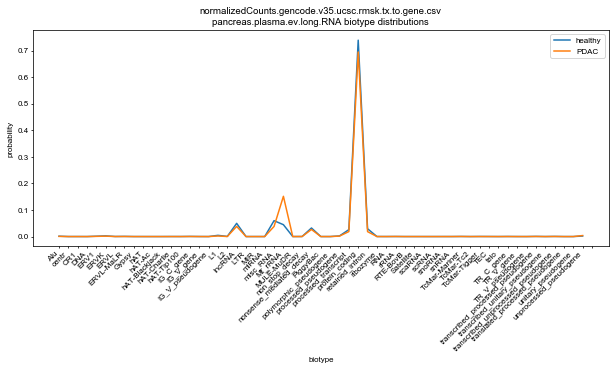

In [31]:
# create panel
figureWidthInInches = 8
figureHeightInInches = 3
fig = plt.figure(figsize=(figureWidthInInches,figureHeightInInches))
panel = mplu.createPanelSameSizeAsFig(fig)

title = dataSet + "\npancreas.plasma.ev.long.RNA biotype distributions"

legendLabels = ['healthy', 'PDAC']
pHealthyDF = pd.DataFrame(healthyBioTypeProbSeries)
PlotProbMass(panel, pHealthyDF, legendLabels, title)

# legendLabels = ['PDAC']
pPDAC_DF = pd.DataFrame(PDAC_BioTypeProbSeries)
PlotProbMass(panel, pPDAC_DF, legendLabels, title)

outfile = imgOutDir.joinpath("healthy_PDAC_biotype_distibutions.png")
print(outfile)
# if you do not set bbox_inches saved img will be clipped
fig.savefig(outfile, bbox_inches='tight') #BME163 style sheet should set dpi=600

In [52]:
fdf = pd.DataFrame( healthySeries )
fdf.shape

(33, 1)